$$\require{mhchem}$$       

# Improving selectivity with a membrane reactor

We're interested in improving the selectivity of a PFR with two competing reactions:
\begin{align*}
\ce{A + B ->[r_1] D}\\
\ce{A + B ->[r_2] U}
\end{align*}
where $\ce{D}$ is a desirable product, and  $\ce{U}$ is the undesirable product.  We define the selectivity in the reactor as:
\begin{align*}
S_{D/(D+U)}=\frac{F_D}{F_D+F_U}
\end{align*}
The first reaction proceeds with rate $r_1=k_1 C_A^2C_B$ with $k_1=2$dm$^6$/mol$^2\cdot$ s, while the second reaction follows a different rate law $r_2=k_2 C_AC_B^2$ with $k_2=3$dm$^6$/mol$^2\cdot$ s. In either case, the reactor volume is 50L with an inner diameter of 20 cm. You can assume the reactor is isobaric and isothermal. 

#### Part A:  Solve for and plot the flow rates of A, B, D, and U (mol/s) against the distance traveled along the PFR (m). Assume that:
1. the PFR is standard (i.e., not membrane)
2. A and B are flowing into the inner vessel each at a flow rate of $4\; mol/s$
3. the combined, total concentration of A and B at the inlet is $0.8\; mol/dm^3$
4. All reactor flows are in solution, which means that changes in species concentrations do not affect volumetric flowrates significantly.
#### What's the final molar flowrate of D exiting the reactor? (4 pts)

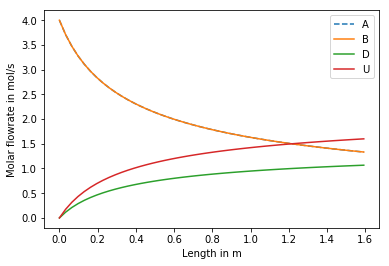

Exit molar flowrate of D is:  1.06666669151


In [1]:
import numpy as np
from scipy.integrate import odeint

k1 = 2 #dm^6/mol^2.s
k2 = 3 #dm^6/mol^2.s
V = 50 #dm^3
D = 2 #dm
SA = 3.14 * D**2 / 4

Fa0 = 4 #mol/s
Fb0 = 4 #mol/s
Fd0 = 0
Fu0 = 0
Ft0 = [Fa0,Fb0,Fd0,Fu0]

Ct0 = 0.8 # mol/dm^3

v0 = sum(Ft0) / Ct0 #dm^3/s

def PFR (F,V):
    Fa, Fb, Fd, Fu = F
    Ft = Fa + Fb + Fd + Fu
    
    v = v0
    
    Ca = Fa / v
    Cb = Fb / v
    Cd = Fd / v
    Cu = Fu / v
    
    r1 = k1 * Ca**2 * Cb
    r2 = k2 * Ca * Cb**2
    
    ra = - r1 - r2
    rb = - r1 - r2
    rd = r1
    ru = r2
    
    dFadV = ra
    dFbdV = rb
    dFddV = rd
    dFudV = ru
    
    return dFadV, dFbdV, dFddV, dFudV

V = np.linspace(0,50)
ans = odeint(PFR,Ft0,V)
#print (ans)
import matplotlib.pyplot as plt



plt.plot(V/(10*SA),ans[:,0],r'--',V/(10*SA),ans[:,1],V/(10*SA),ans[:,2],V/(10*SA),ans[:,3])
plt.xlabel("Length in m")
plt.ylabel("Molar flowrate in mol/s")
plt.legend(["A","B","D","U"])
plt.show()

print("Exit molar flowrate of D is: ", ans[-1,2])



#### Part B:  Calculate and plot the selectivity $S_{D/(D+U)}$ vs. reactor length (m). The scale of $S_{D/(D+U)}$ on the y-axis should be [0, 1] (2 pts)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in true_divide


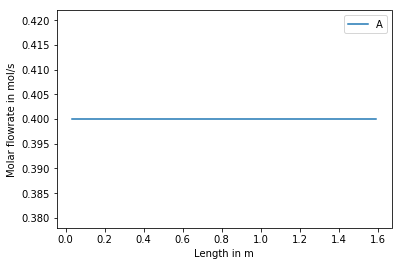

In [2]:
import numpy as np
from scipy.integrate import odeint

k1 = 2 #dm^6/mol^2.s
k2 = 3 #dm^6/mol^2.s
V = 50 #dm^3
D = 2 #dm
SA = 3.14 * D**2 / 4

Fa0 = 4 #mol/s
Fb0 = 4 #mol/s
Fd0 = 0
Fu0 = 0
Ft0 = [Fa0,Fb0,Fd0,Fu0]

Ct0 = 0.8 # mol/dm^3

v0 = sum(Ft0) / Ct0 #dm^3/s

def PFR (F,V):
    Fa, Fb, Fd, Fu = F
    Ft = Fa + Fb + Fd + Fu
    
    v = v0
    
    Ca = Fa / v
    Cb = Fb / v
    Cd = Fd / v
    Cu = Fu / v
    
    r1 = k1 * Ca**2 * Cb
    r2 = k2 * Ca * Cb**2
    
    ra = - r1 - r2
    rb = - r1 - r2
    rd = r1
    ru = r2
    
    dFadV = ra
    dFbdV = rb
    dFddV = rd
    dFudV = ru
    
    return dFadV, dFbdV, dFddV, dFudV

V = np.linspace(0,50)
ans = odeint(PFR,Ft0,V)
#print (ans)
import matplotlib.pyplot as plt

D_arr = np.array(ans[:,2])
U_arr = np.array(ans[:,3])
a = np.true_divide(D_arr,(D_arr+U_arr))

plt.plot(V/(10*SA),a)
plt.xlabel("Length in m")
plt.ylabel("Molar flowrate in mol/s")
plt.legend(["A","B","D","U"])
plt.show()
plt.savefig("abcd")
#print("Exit molar flowrate of D is: ", ans[-1,2])



#### Part C:  Solve for and plot the flow rate profiles of A, B, D, and U (mol/s) against the distance traveled along the PFR (m). This time, assume that:
1. The PFR is a membrane PFR, where A is fed into the inner vessel, B is fed into the outer vessel, and only species B may transport across the membrane.
2. A is flowing in to the inner vessel at a molar flow rate of $4\; mol/s$ and a concentration of $0.4\; mol/dm^3$.
3. B is flowing in to the outer vessel at a molar flow rate of $4\; mol/s$ and a concentration of $0.4\; mol/dm^3$.
4. mass transport across the membrane (from the outer to the inner vessel) can be modeled with $R_B=ak_{cB}(C_{Bin}-C_{Bout})$ with $k_{cB}=0.1\;$dm/s$.
#### (6 pts)

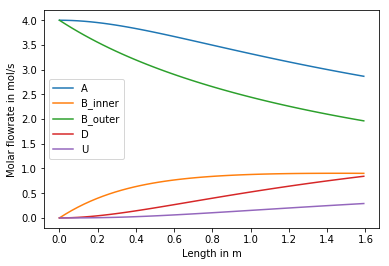

Exit molar flowrate of D is:  0.842836445285


In [3]:
import numpy as np
from scipy.integrate import odeint

k1 = 2 #dm^6/mol^2.s
k2 = 3 #dm^6/mol^2.s
V = 50 #dm^3
D = 2 #dm
SA = np.pi * D**2 / 4
a = 4 / D #dm-1
kcb = 0.1 #dm/s

Fa0 = 4 #mol/s
Fbinr0 = 0 #mol/s
Fboutr0 = 4 #mol/s
Fd0 = 0
Fu0 = 0

F0 = [Fa0,Fbinr0,Fboutr0,Fd0,Fu0]

Ctinr0 = 0.4 # mol/dm^3
Ctoutr0 = 0.4 #mol/dm^3

vinr0 = (Fa0 + Fbinr0 + Fd0 + Fu0) / Ctinr0 #dm^3/s
voutr0 = Fboutr0 / Ctoutr0

def PFR (F,V):
    Fa, Fbinr, Fboutr, Fd, Fu = F
    Ftinr = Fa + Fbinr + Fd + Fu
    
    vinr = vinr0   
    voutr = voutr0
    
    Ca = Fa / vinr
    Cbinr = Fbinr / vinr
    Cboutr = Fboutr / voutr
    Cd = Fd / vinr
    Cu = Fu / vinr
    
    r1 = k1 * Ca**2 * Cbinr
    r2 = k2 * Ca * Cbinr**2
    r3 = kcb * a * (Cboutr-Cbinr)
    
    #only reaction rates:
    ra = - r1 - r2
    rb = - r1 - r2 
    rd = r1
    ru = r2
    
    #overall rates:
    dFadV = ra
    dFbinrdV = rb + r3
    dFboutrdV = - r3
    dFddV = rd
    dFudV = ru
    
    return dFadV, dFbinrdV, dFboutrdV, dFddV, dFudV

V = np.linspace(0,50)
ans = odeint(PFR,F0,V)
#print (ans)
import matplotlib.pyplot as plt


plt.plot(V/(10*SA),ans[:,0],V/(10*SA),ans[:,1],V/(10*SA),ans[:,2],V/(10*SA),ans[:,3],V/(10*SA),ans[:,4])
plt.xlabel("Length in m")
plt.ylabel("Molar flowrate in mol/s")
plt.legend(["A","B_inner","B_outer","D","U"])
plt.show()

Dexit = ans[-1,3]
print("Exit molar flowrate of D is: ", Dexit)


#### Part D:  To make a fair comparison comparison between the standard PFR and the membrane PFR, we want to analyze a membrane PFR system that has an outlet molar flowrate of D equal to the one you calculated in Part A (for the standard PFR). For the membrane PFR, what is a molar feedrate of B in the outer vessel (mol/s) that will yield this outlet flowrate of D? (4 pts)

In [4]:
import numpy as np
from scipy.integrate import odeint

Dexit_PFR = 1.067


k1 = 2 #dm^6/mol^2.s
k2 = 3 #dm^6/mol^2.s
V = 50 #dm^3
D = 2 #dm
SA = 3.14 * D**2 / 4
a = 4 / D #dm-1
kcb = 0.1 #dm/s
Fboutr0 = 4
Fa0 = 4 #mol/s

Fbinr0 = 0 #mol/s
Fd0 = 0
Fu0 = 0


Ctinr0 = 0.4 # mol/dm^3
Ctoutr0 = 0.4 #mol/dm^3

vinr0 = (Fa0 + Fbinr0 + Fd0 + Fu0) / Ctinr0 #dm^3/s
voutr0 = Fboutr0 / Ctoutr0

def PFR (F,V):
    Fa, Fbinr, Fboutr, Fd, Fu = F
    Ftinr = Fa + Fbinr + Fd + Fu

    vinr = (vinr0)
    voutr = (voutr0)

    Ca = Fa / vinr
    Cbinr = Fbinr / vinr
    Cboutr = Fboutr / voutr
    Cd = Fd / vinr
    Cu = Fu / vinr

    r1 = k1 * Ca**2 * Cbinr
    r2 = k2 * Ca * Cbinr**2
    r3 = kcb * a * (Cboutr-Cbinr)

    #only reaction rates:
    ra = - r1 - r2
    rb = - r1 - r2 
    rd = r1
    ru = r2

    #overall rates:
    dFadV = ra
    dFbinrdV = rb + r3
    dFboutrdV = - r3
    dFddV = rd
    dFudV = ru

    return dFadV, dFbinrdV, dFboutrdV, dFddV, dFudV

    
def func (Fboutr0):
    F0 = [Fa0,Fbinr0,Fboutr0,Fd0,Fu0]
    V = np.linspace(0,50)
    ans = odeint(PFR,F0,V)
    Dexit = ans[-1,3]
    return Dexit-1.067

from scipy.optimize import fsolve

q = fsolve(func, 6)
print ("Value of Fb (outer shell) to get same Fd as 1A is ", q[0])



Value of Fb (outer shell) to get same Fd as 1A is  6.06190457819


#### Part E:  Now we want to compare the selectivities of the two reactor types. Start by recalculating the flow profiles in the membrane PFR—i.e., Part C—but use the newly identified inlet flowrate of B. Then use this profile to calculate the selectivity (mol/mol) as a function of reactor length (m). Now plot this new selectivity profile alongside the selectivity profile you created in Part B. Which reactor configuration would you recommend, standard PFR or membrane? Why? (2 pts)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in true_divide


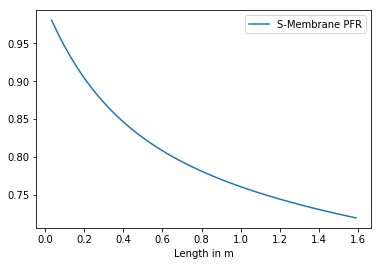

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:139: RuntimeWarning: invalid value encountered in true_divide


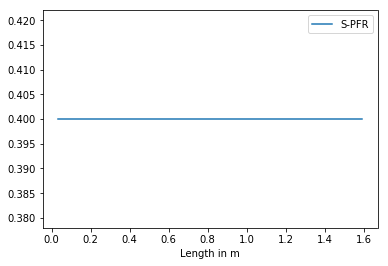

In [ ]:
import numpy as np
from scipy.integrate import odeint

k1 = 2 #dm^6/mol^2.s
k2 = 3 #dm^6/mol^2.s
V = 50 #dm^3
D = 2 #dm
SA = np.pi * D**2 / 4
a = 4 / D #dm-1
kcb = 0.1 #dm/s

Fa0 = 4 #mol/s
Fbinr0 = 0 #mol/s
Fboutr0 = 6.0619 #mol/s
Fd0 = 0
Fu0 = 0

F0 = [Fa0,Fbinr0,Fboutr0,Fd0,Fu0]

Ctinr0 = 0.4 # mol/dm^3
Ctoutr0 = 0.4 #mol/dm^3

vinr0 = (Fa0 + Fbinr0 + Fd0 + Fu0) / Ctinr0 #dm^3/s
voutr0 = Fboutr0 / Ctoutr0

def PFR (F,V):
    Fa, Fbinr, Fboutr, Fd, Fu = F
    Ftinr = Fa + Fbinr + Fd + Fu
    
    vinr = vinr0   
    voutr = voutr0
    
    Ca = Fa / vinr
    Cbinr = Fbinr / vinr
    Cboutr = Fboutr / voutr
    Cd = Fd / vinr
    Cu = Fu / vinr
    
    r1 = k1 * Ca**2 * Cbinr
    r2 = k2 * Ca * Cbinr**2
    r3 = kcb * a * (Cboutr-Cbinr)
    
    #only reaction rates:
    ra = - r1 - r2
    rb = - r1 - r2 
    rd = r1
    ru = r2
    
    #overall rates:
    dFadV = ra
    dFbinrdV = rb + r3
    dFboutrdV = - r3
    dFddV = rd
    dFudV = ru
    
    return dFadV, dFbinrdV, dFboutrdV, dFddV, dFudV

V = np.linspace(0,50)
ans = odeint(PFR,F0,V)
#print (ans)
import matplotlib.pyplot as plt

"""
plt.plot(V/100*SA,ans[:,0],V/100*SA,ans[:,1],V/100*SA,ans[:,2],V/100*SA,ans[:,3],V/100*SA,ans[:,4])
plt.xlabel("Length in m")
plt.ylabel("Molar flowrate in mol/s")
plt.legend(["A","B_inner","B_outer","D","U"])
plt.show()
"""
Dexit = ans[-1,3]
#print("Exit molar flowrate of D is: ", Dexit)

D_arr = np.array(ans[:,3])
U_arr = np.array(ans[:,4])
a = np.true_divide(D_arr,(D_arr+U_arr))

plt.plot(V/(10*SA),a)
plt.legend(["S-Membrane PFR"])
plt.xlabel("Length in m")
plt.show()






import numpy as np
from scipy.integrate import odeint

k1 = 2 #dm^6/mol^2.s
k2 = 3 #dm^6/mol^2.s
V = 50 #dm^3
D = 2 #dm
SA = 3.14 * D**2 / 4

Fa0 = 4 #mol/s
Fb0 = 4 #mol/s
Fd0 = 0
Fu0 = 0
Ft0 = [Fa0,Fb0,Fd0,Fu0]

Ct0 = 0.8 # mol/dm^3

v0 = sum(Ft0) / Ct0 #dm^3/s

def PFR (F,V):
    Fa, Fb, Fd, Fu = F
    Ft = Fa + Fb + Fd + Fu
    
    v = v0
    
    Ca = Fa / v
    Cb = Fb / v
    Cd = Fd / v
    Cu = Fu / v
    
    r1 = k1 * Ca**2 * Cb
    r2 = k2 * Ca * Cb**2
    
    ra = - r1 - r2
    rb = - r1 - r2
    rd = r1
    ru = r2
    
    dFadV = ra
    dFbdV = rb
    dFddV = rd
    dFudV = ru
    
    return dFadV, dFbdV, dFddV, dFudV

V = np.linspace(0,50)
ans = odeint(PFR,Ft0,V)
#print (ans)
import matplotlib.pyplot as plt

D_arr = np.array(ans[:,2])
U_arr = np.array(ans[:,3])
a = np.true_divide(D_arr,(D_arr+U_arr))
plt.xlabel("Length in m")
plt.plot(V/(10*SA),a)
plt.xlabel("Length in m")
plt.legend(["S-PFR"])

#print("Exit molar flowrate of D is: ", ans[-1,2])

plt.show()

I would prefer going for the membrane PFR as it assures higher selectivity

# Bonus

#### For regulatory reasons we need a minimum selectivity of 75%, and for economic reasons we want a conversion of at least 25%. We are allowed to change the feedrate of B and the length of the membrane PFR. To the nearest decimeter, what's the smallest reactor length we can use to achieve both criteria? (4 pts)

In [ ]:
import numpy as np
from scipy.integrate import odeint

k1 = 2 #dm^6/mol^2.s
k2 = 3 #dm^6/mol^2.s
V = 50 #dm^3
D = 2 #dm
SA = np.pi * D**2 / 4
a = 4 / D #dm-1
kcb = 0.1 #dm/s

Fa0 = 4 #mol/s
Fbinr0 = 0 #mol/s
Fboutr0 = 6.0619 #mol/s
Fd0 = 0
Fu0 = 0

F0 = [Fa0,Fbinr0,Fboutr0,Fd0,Fu0]

Ctinr0 = 0.4 # mol/dm^3
Ctoutr0 = 0.4 #mol/dm^3

vinr0 = (Fa0 + Fbinr0 + Fd0 + Fu0) / Ctinr0 #dm^3/s
voutr0 = Fboutr0 / Ctoutr0

def PFR (F,V):
    Fa, Fbinr, Fboutr, Fd, Fu = F
    Ftinr = Fa + Fbinr + Fd + Fu
    
    vinr = vinr0   
    voutr = voutr0
    
    Ca = Fa / vinr
    Cbinr = Fbinr / vinr
    Cboutr = Fboutr / voutr
    Cd = Fd / vinr
    Cu = Fu / vinr
    
    r1 = k1 * Ca**2 * Cbinr
    r2 = k2 * Ca * Cbinr**2
    r3 = kcb * a * (Cboutr-Cbinr)
    
    #only reaction rates:
    ra = - r1 - r2
    rb = - r1 - r2 
    rd = r1
    ru = r2
    
    #overall rates:
    dFadV = ra
    dFbinrdV = rb + r3
    dFboutrdV = - r3
    dFddV = rd
    dFudV = ru
    
    return dFadV, dFbinrdV, dFboutrdV, dFddV, dFudV

import matplotlib.pyplot as plt

#intuitively, conversion would increase if Fboutr0 increases. 
#So we assume a high value of Fboutr0.
#We start with least value of length  
def abcd (l):
    Fboutr0 = 100
    F0 = [Fa0,Fbinr0,Fboutr0,Fd0,Fu0]
    V = np.linspace(0,l*SA)
    ans = odeint(PFR,F0,V)
    S = np.true_divide(ans[:,3],(ans[:,3]+ans[:,4]))
    X = (Fa0-ans[:,0])/Fa0
    return X,S

from scipy.optimize import minimize

asd = minimize (abcd, 0)


